In [29]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision. It stands for the Canadian Institute for Advanced Research (CIFAR), where it was originally developed. The dataset consists of 60,000 color images, each of size 32x32 pixels, belonging to 10 different classes. Each class contains 6,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

The dataset is split into a training set and a test set, with 50,000 images in the training set and 10,000 images in the test set. It's commonly used for developing and benchmarking machine learning models, particularly in tasks like image classification, object detection, and image segmentation.

CIFAR-10 is considered a relatively small dataset compared to others like ImageNet, but it's popular due to its simplicity and ease of use for experimenting with various machine learning algorithms and techniques. Additionally, its small size makes it more accessible for researchers and students with limited computational resources.

In [31]:
#only for mac or when you get an ssl warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


In [32]:

cifar10 = keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 50000, 32, 32, 3


(50000, 32, 32, 3)


In [33]:

# Normalize: 0,255 -> 0,1
X_train, X_test = X_train / 255.0, X_test / 255.0

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


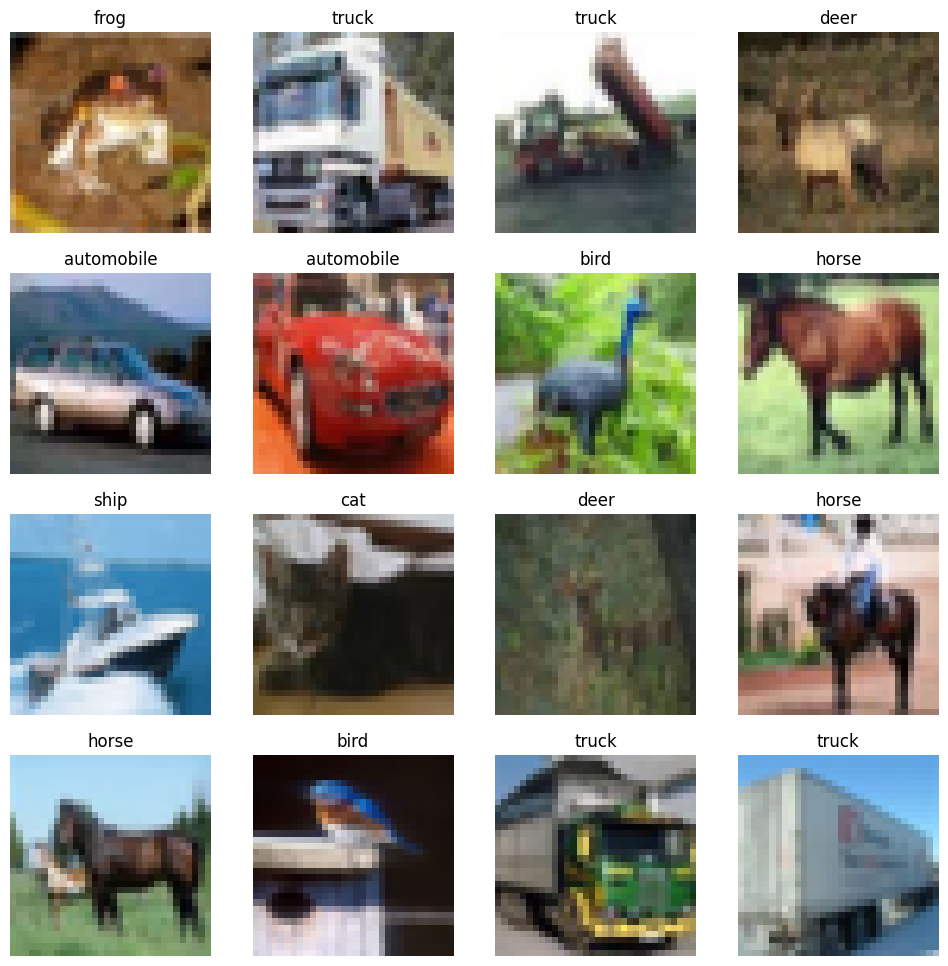

In [34]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i]) 
    plt.axis('off')
    plt.title(classes[y_train[i][0]])

Build the Model: A Sequential model is created using Keras. Layers are added one by one:

1. Conv2D: This layer creates a convolutional layer with 32 filters of size 3x3, using ReLU activation function.
2. MaxPool2D: This layer performs max pooling with a pool size of 2x2.
3. Another set of Conv2D and MaxPool2D layers with the same configurations as before.
4. Flatten: This layer flattens the input to be fed into a fully connected layer.
5. Two Dense layers with 64 and 10 units respectively. The last layer has no activation function, as it's used for classification.

In [35]:

# model...
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())
#import sys; sys.exit()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [36]:

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.legacy.Adam(learning_rate=.001) #keras.optimizers.Adam(lr=0.001) got a warning for mac M1 and M2 chips
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)


In [37]:

# training
batch_size = 64
epochs = 8

model.fit(X_train, y_train, epochs=epochs,
          batch_size=batch_size, verbose=2)


Epoch 1/8
782/782 - 6s - loss: 1.5616 - accuracy: 0.4378 - 6s/epoch - 8ms/step
Epoch 2/8
782/782 - 6s - loss: 1.2319 - accuracy: 0.5634 - 6s/epoch - 7ms/step
Epoch 3/8
782/782 - 6s - loss: 1.1061 - accuracy: 0.6114 - 6s/epoch - 8ms/step
Epoch 4/8
782/782 - 6s - loss: 1.0182 - accuracy: 0.6466 - 6s/epoch - 8ms/step
Epoch 5/8
782/782 - 7s - loss: 0.9607 - accuracy: 0.6657 - 7s/epoch - 8ms/step
Epoch 6/8
782/782 - 7s - loss: 0.9065 - accuracy: 0.6847 - 7s/epoch - 9ms/step
Epoch 7/8
782/782 - 7s - loss: 0.8716 - accuracy: 0.6971 - 7s/epoch - 9ms/step
Epoch 8/8
782/782 - 6s - loss: 0.8315 - accuracy: 0.7087 - 6s/epoch - 8ms/step


In [38]:

# evaulate
model.evaluate(X_test,  y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.9391 - accuracy: 0.6774 - 473ms/epoch - 3ms/step


[0.9390919208526611, 0.6773999929428101]